In [206]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
data=pd.read_csv("usecase1.csv")
data.head()

,TCID,AppName,EXEDATE,STATUS,RCA(ENV|CODE|DATA|REQ)
0,79,Facebook,07.30.19,Fail,DEV|df.read_csv(...)|file not found|Importing ...
1,185,TechCrunch,05.26.19,Fail,STG|for i in Age|list index out of range|looping
2,169,Guardian,07.06.19,Fail,"STG|for i in range(0,2)|List out of Index [23]..."
3,156,Zomato,06.20.19,Fail,"DEV| for x,d in data.Height, data.shape[0]| to..."
4,7,Zomato,05.01.19,Pass,NaN


In [186]:
data.isnull().sum()


TCID                        0
AppName                     0
EXEDATE                     0
STATUS                      0
RCA(ENV|CODE|DATA|REQ)    987
dtype: int64

In [187]:
data.notnull().sum()

TCID                      2000
AppName                   2000
EXEDATE                   2000
STATUS                    2000
RCA(ENV|CODE|DATA|REQ)    1013
dtype: int64

In [188]:
df = pd.DataFrame(pd.read_csv("usecase1.csv"))

In [189]:
df1 = df[df['STATUS'] == 'Fail']
print('\nResult dataframe :\n', df1)


Result dataframe :
       TCID     AppName   EXEDATE STATUS  \
0       79    Facebook  07.30.19   Fail   
1      185  TechCrunch  05.26.19   Fail   
2      169    Guardian  07.06.19   Fail   
3      156      Zomato  06.20.19   Fail   
5      131      Zomato  06.10.19   Fail   
...    ...         ...       ...    ...   
1991   182         ACM  07.16.19   Fail   
1992    33    UberEats  09.23.19   Fail   
1995   174      Zomato  04.04.19   Fail   
1998   178        Uber  06.05.19   Fail   
1999   168     Netflix  09.18.19   Fail   

                                 RCA(ENV|CODE|DATA|REQ)  
0     DEV|df.read_csv(...)|file not found|Importing ...  
1      STG|for i in Age|list index out of range|looping  
2     STG|for i in range(0,2)|List out of Index [23]...  
3     DEV| for x,d in data.Height, data.shape[0]| to...  
5     DEV|df = df[df['Android Ver'] != np.nan]|name ...  
...                                                 ...  
1991  DEV|df = df[df['Android Ver'] != np.nan]|name ... 

In [190]:
df2=df[df['STATUS'] == 'Pass']
print("\n the result dataframe :\n",df2)


 the result dataframe :
       TCID     AppName   EXEDATE STATUS RCA(ENV|CODE|DATA|REQ)
4        7      Zomato  05.01.19   Pass                    NaN
6      102     Netflix  05.20.19   Pass                    NaN
9      125        Uber  09.12.19   Pass                    NaN
11     167     Hotstar  08.23.19   Pass                    NaN
12      85        Uber  08.13.19   Pass                    NaN
...    ...         ...       ...    ...                    ...
1990    29        Uber  07.06.19   Pass                    NaN
1993    93    UberEats  07.24.19   Pass                    NaN
1994   138    Guardian  06.23.19   Pass                    NaN
1996    71  TechCrunch  07.10.19   Pass                    NaN
1997    41        Uber  04.03.19   Pass                    NaN

[987 rows x 5 columns]


In [191]:
df3=df[df.STATUS == 'Fail'][['AppName']].head()
print('\nResult dataframe :\n', df3) 



Result dataframe :
       AppName
0    Facebook
1  TechCrunch
2    Guardian
3      Zomato
5      Zomato


In [192]:
df=df.set_index(["AppName","EXEDATE"])
df=df.sort_index()
print(df)
print(df.columns)

                  TCID STATUS  \
AppName EXEDATE                 
ACM     04.02.19    90   Pass   
        04.03.19    65   Pass   
        04.03.19    38   Pass   
        04.04.19    60   Pass   
        04.04.19   148   Pass   
...                ...    ...   
Zomato  09.27.19   112   Pass   
        09.27.19    98   Pass   
        09.28.19    73   Fail   
        09.28.19   140   Fail   
        09.30.19   149   Pass   

                                             RCA(ENV|CODE|DATA|REQ)  
AppName EXEDATE                                                      
ACM     04.02.19                                                NaN  
        04.03.19                                                NaN  
        04.03.19                                                NaN  
        04.04.19                                                NaN  
        04.04.19                                                NaN  
...                                                             ...  
Zomato  09

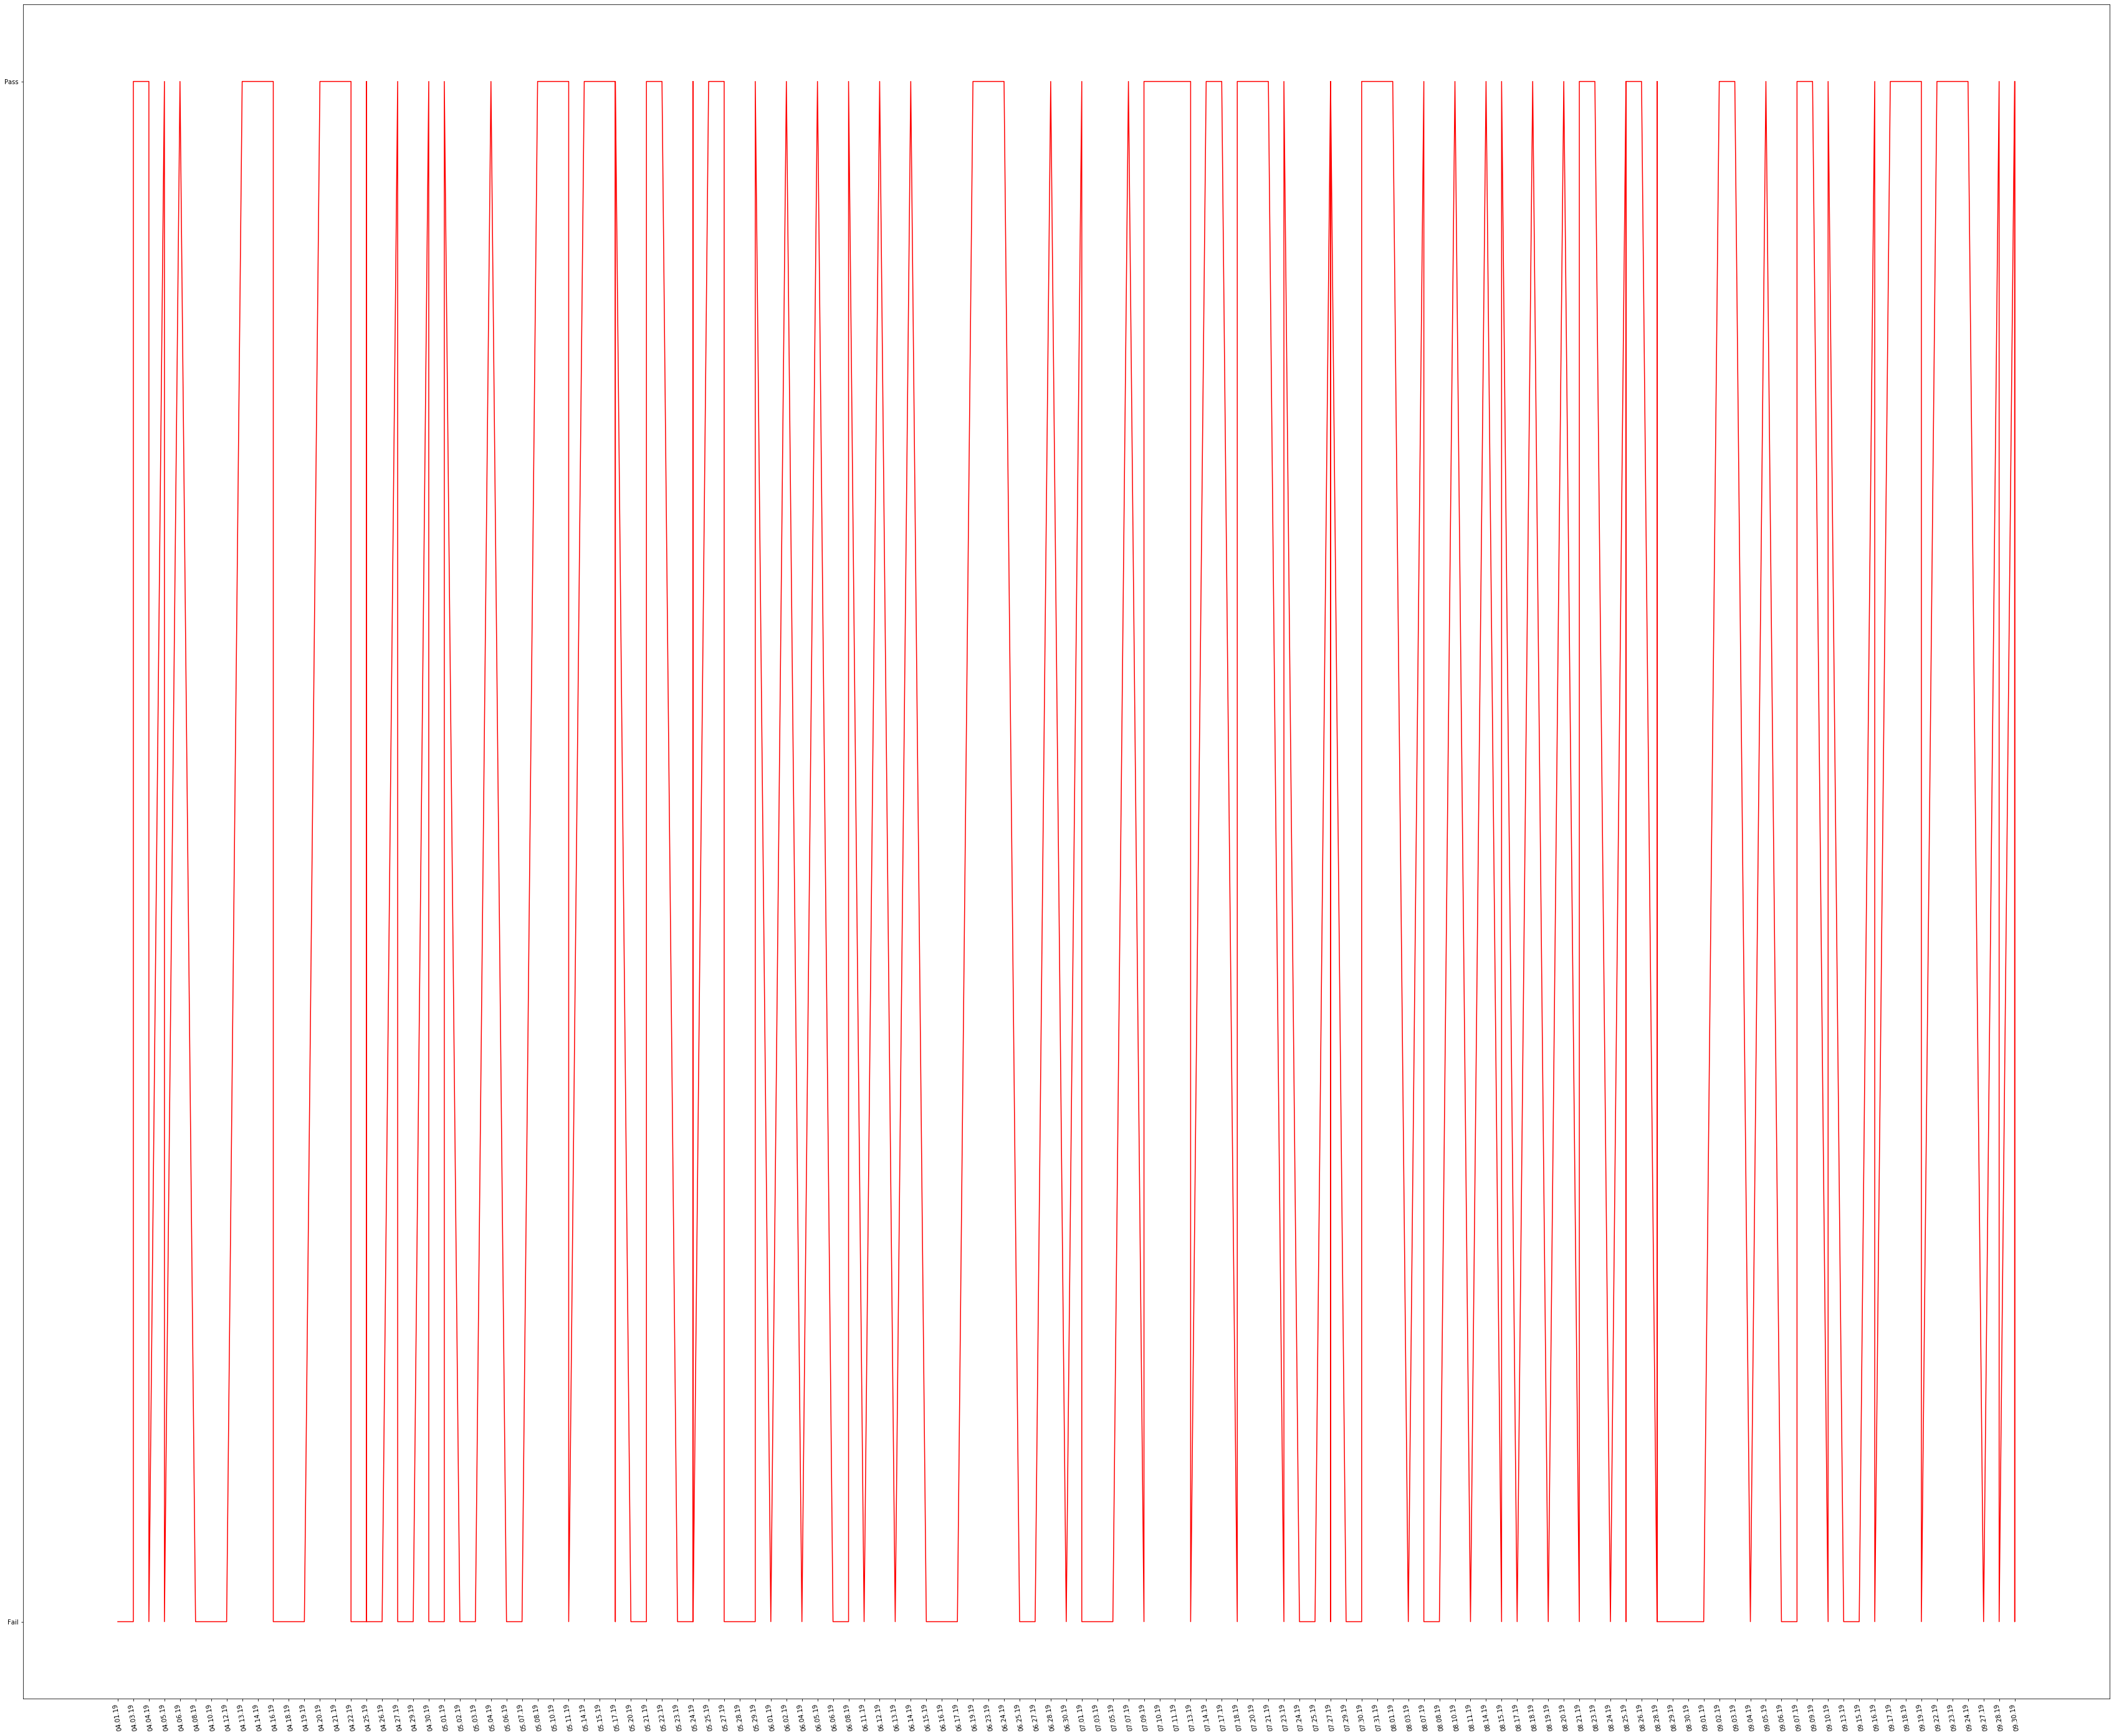

In [193]:
plt.figure(figsize=(60,50))
plt.plot(df.loc[("Hotstar"),"STATUS"],color='red')
plt.xticks(rotation=100)
plt.show()

In [194]:
fail=df.STATUS =='Fail'
data1=df[fail]
print(df.loc[:,'RCA(ENV|CODE|DATA|REQ)'])


AppName  EXEDATE 
ACM      04.02.19                                                  NaN
         04.03.19                                                  NaN
         04.03.19                                                  NaN
         04.04.19                                                  NaN
         04.04.19                                                  NaN
                                           ...                        
Zomato   09.27.19                                                  NaN
         09.27.19                                                  NaN
         09.28.19    PROD|data.replace(data.Name, 'NA')|Not replaci...
         09.28.19    PROD|import plotly|The plotly.plotly module is...
         09.30.19                                                  NaN
Name: RCA(ENV|CODE|DATA|REQ), Length: 2000, dtype: object


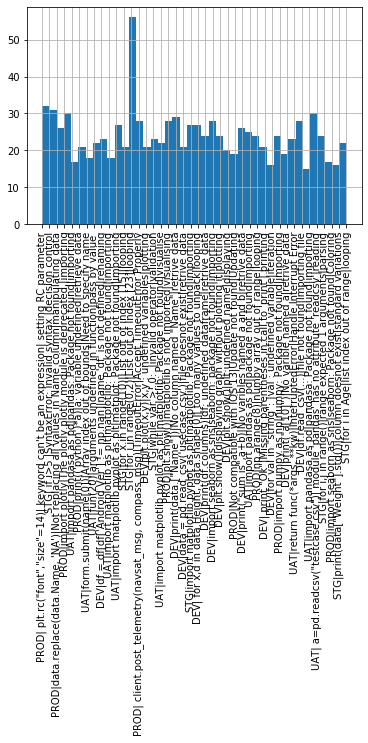

In [195]:
(df.loc[:,"RCA(ENV|CODE|DATA|REQ)"]).hist(bins=42)
 
plt.xticks(rotation=90)
plt.show()

In [196]:
print(pd.value_counts(df.loc[:,"RCA(ENV|CODE|DATA|REQ)"]).head(5))

STG|for i in range(0,2)|List out of Index [23]|looping                                   56
PROD| plt.rc("font","size"=14)| keyword can't be an expression| setting RC parameter     32
STG| if i>5 |SyntaxError: invalid syntax |decision control                               31
PROD|import plotly|The plotly.plotly module is deprecated,|importing                     30
UAT| a=pd.readcsv("testcase.csv")| module 'pandas' has no attribute 'readcsv'|reading    30
Name: RCA(ENV|CODE|DATA|REQ), dtype: int64


In [197]:
f=df.STATUS=="Fail"
print(df[f].index.value_counts().head(1))

(Facebook, 05.27.19)    5
dtype: int64


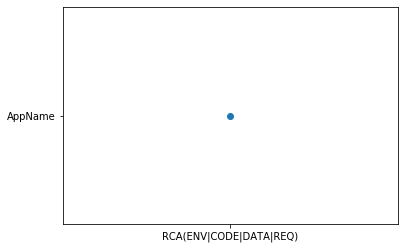

In [198]:
plt.scatter("RCA(ENV|CODE|DATA|REQ)","AppName")
plt.show()

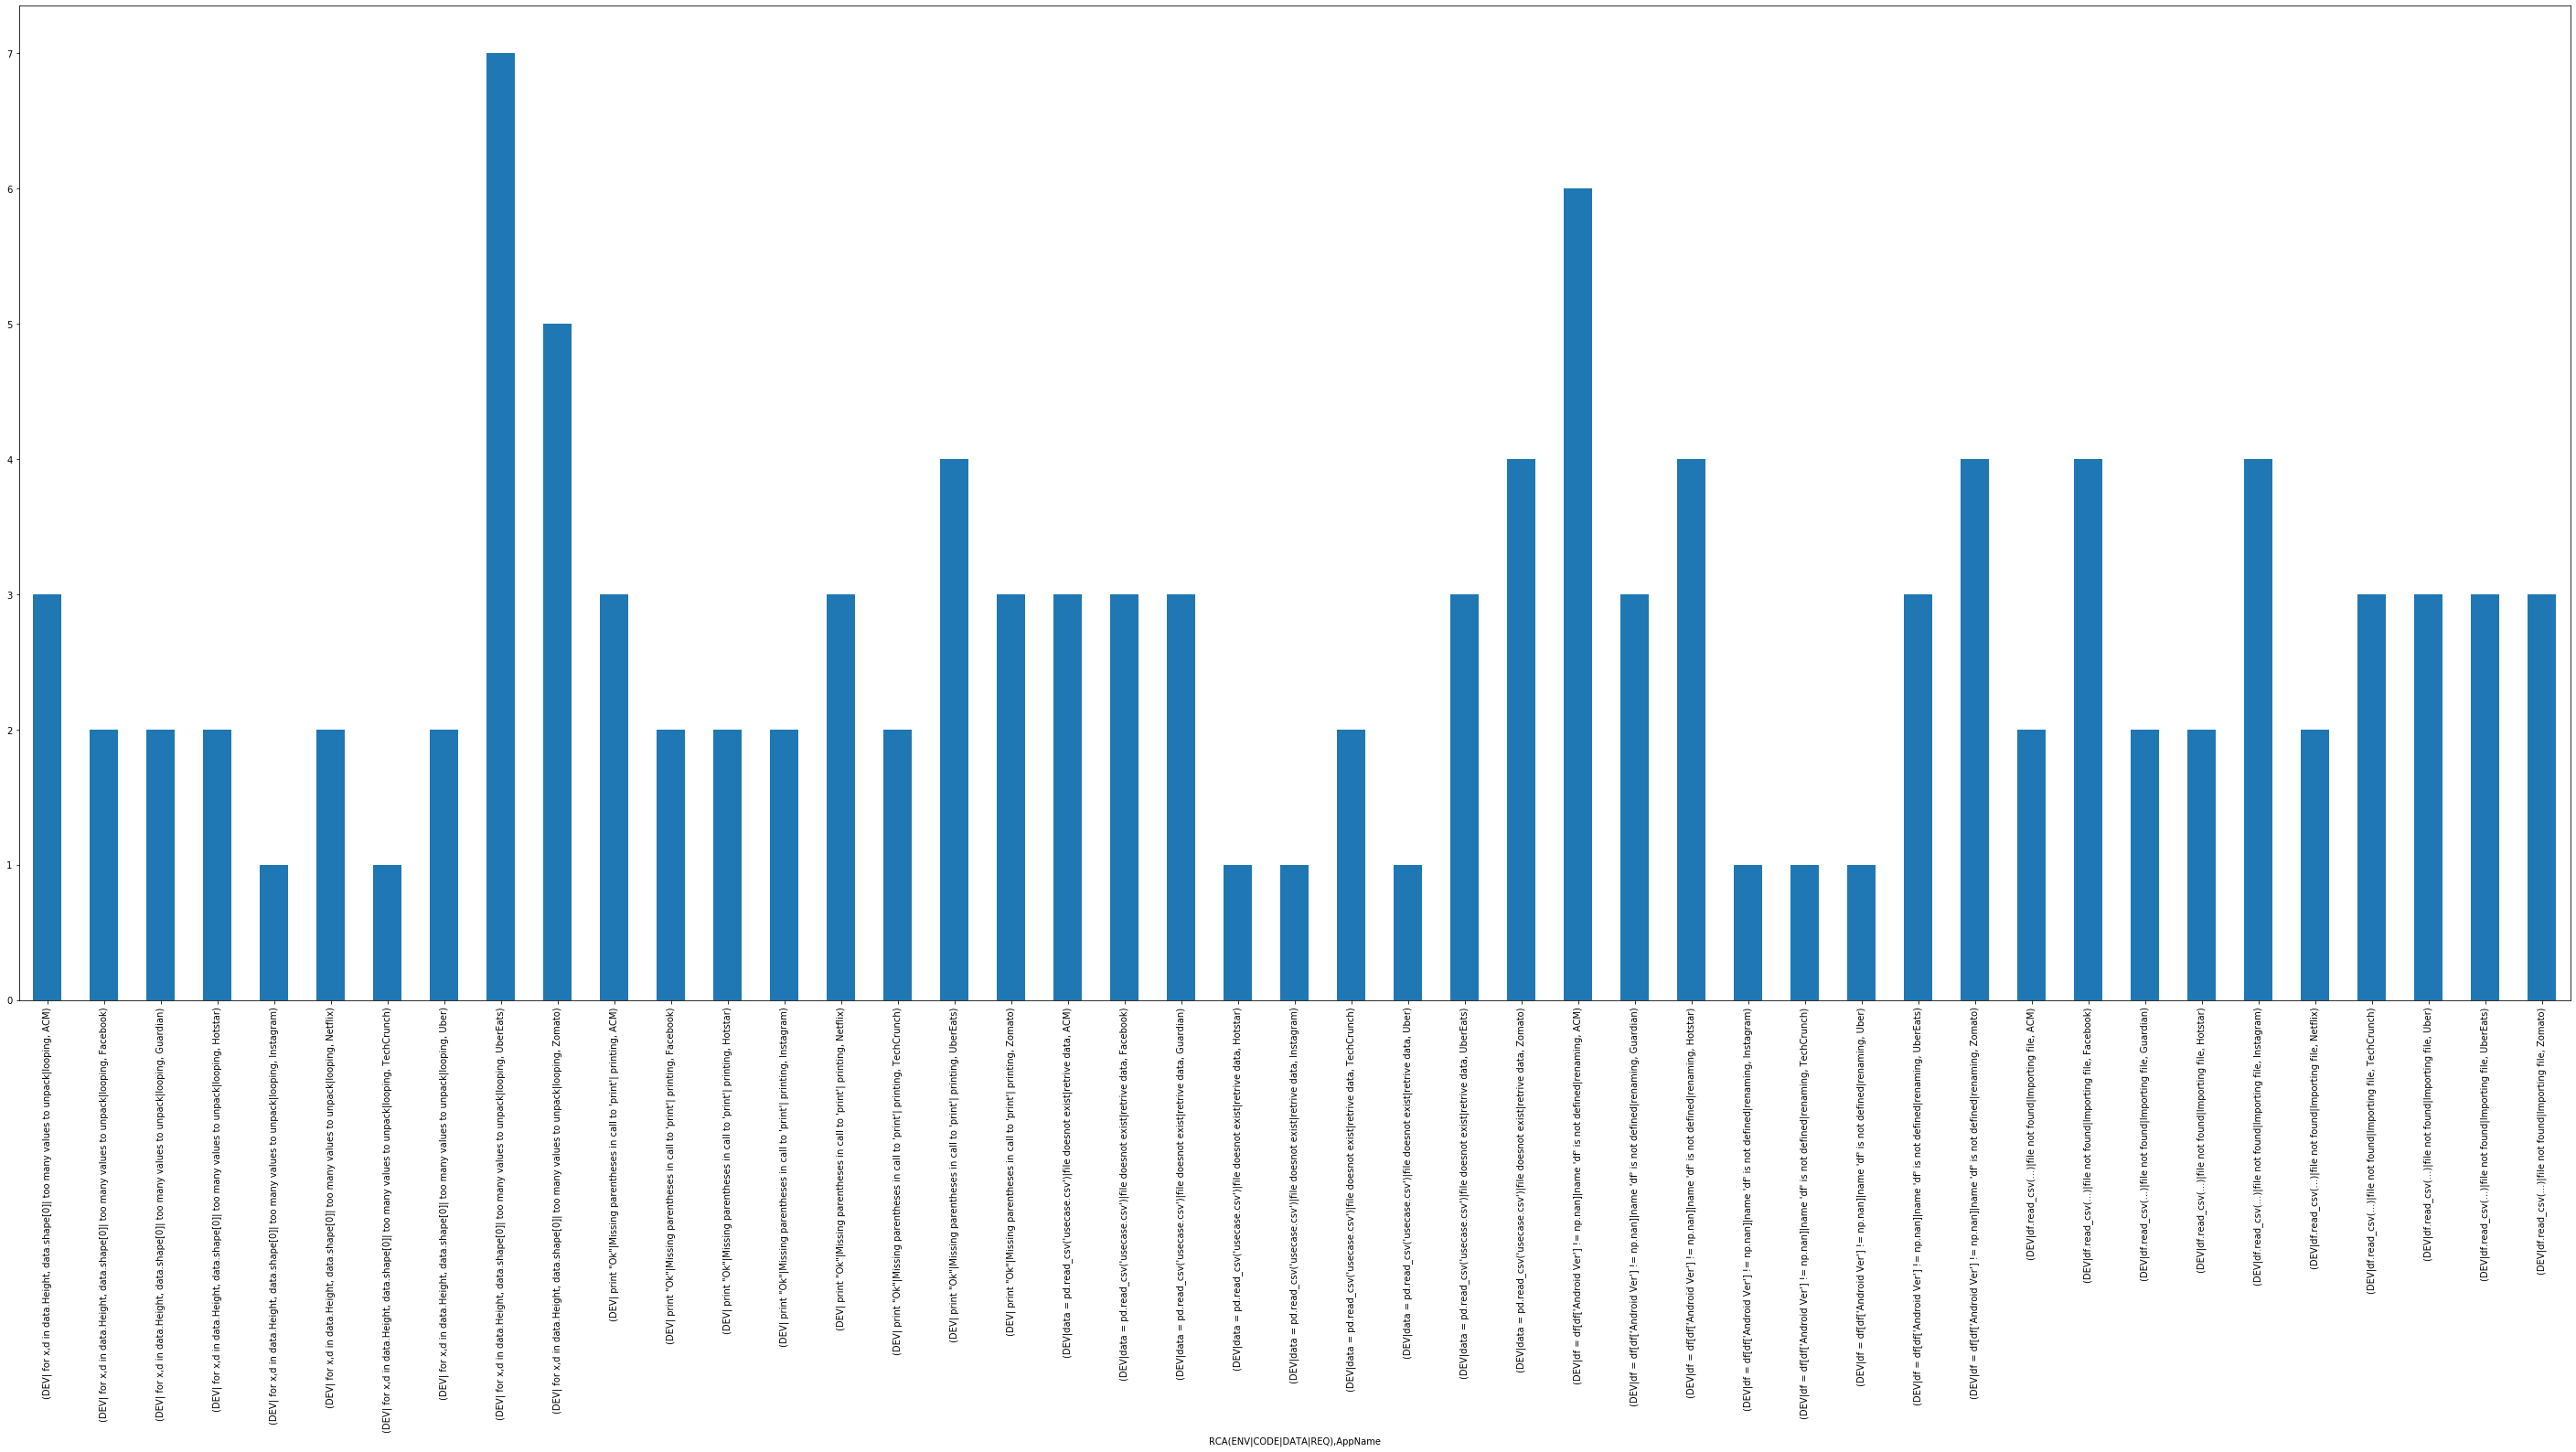

In [205]:
df1=df.groupby(["RCA(ENV|CODE|DATA|REQ)","AppName"]).size().head(45)
plt.figure(figsize=(50,20))
df1.plot.bar()
plt.xticks(rotation=90)
plt.show()

In [200]:
from pandas import DataFrame
df2=DataFrame(data,columns=["TCID","STATUS"])
print(df2)

      TCID STATUS
0       79   Fail
1      185   Fail
2      169   Fail
3      156   Fail
4        7   Pass
...    ...    ...
1995   174   Fail
1996    71   Pass
1997    41   Pass
1998   178   Fail
1999   168   Fail

[2000 rows x 2 columns]


(array([   0,    1,    2, ..., 1997, 1998, 1999]),
 <a list of 2000 Text xticklabel objects>)

<Figure size 3600x4320 with 0 Axes>

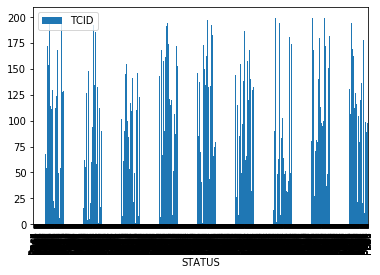

In [201]:
plt.figure(figsize=(50,60))
df.plot(x="STATUS",y="TCID",kind='bar')
plt.xticks(rotation=90)

In [220]:
sns.pairplot(df[df['AppName']=="Zomato"],vars=['TCID',"RCA(ENV|CODE|DATA|REQ)"],hue="STATUS")
plt.suptitle('Apps info', size = 28);

KeyError: 'AppName'